In [75]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [76]:
df = pd.read_csv("D:\ML mini project\credict card approval\clean_dataset.csv")
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [77]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [79]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [80]:
df.describe(include='object')

,Industry,Ethnicity,Citizen
count,690,690,690
unique,14,5,3
top,Energy,White,ByBirth
freq,146,408,625


In [81]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

# Preprocessing

**handling outliers**
Outliers impact negative to our results

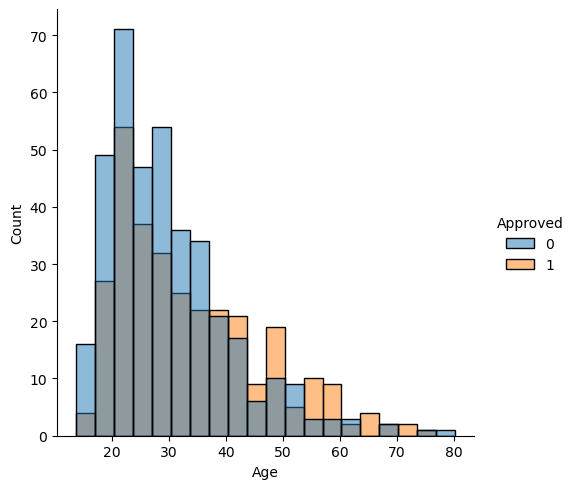

In [82]:
sns.displot(df,x='Age',hue='Approved')

In [83]:
df['Age'] = df['Age'].clip(upper=65)

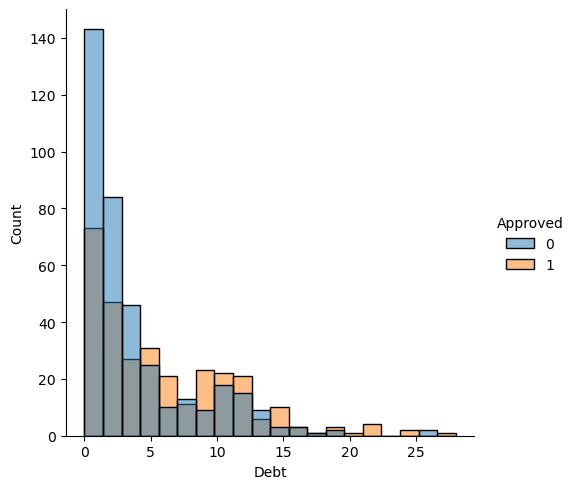

In [84]:
sns.displot(df,x='Debt',hue='Approved')

In [85]:
df['Debt'] = df['Debt'].clip(upper=15)

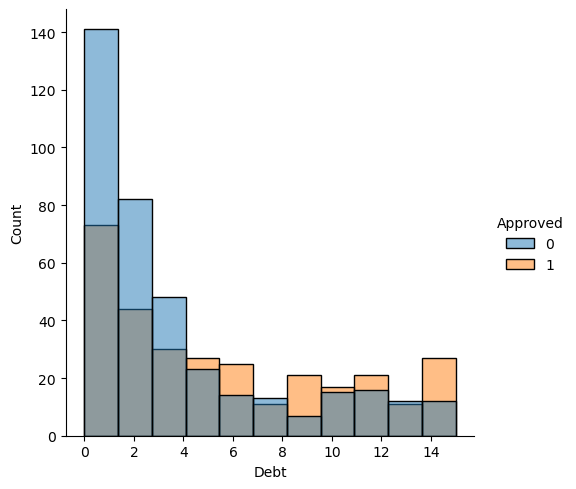

In [86]:
sns.displot(df,x='Debt',hue='Approved')

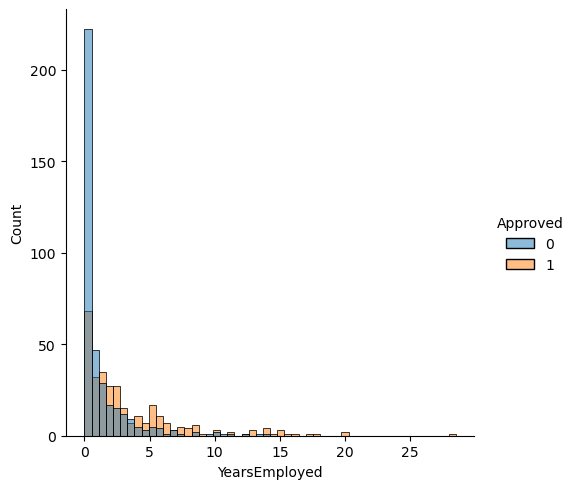

In [87]:
sns.displot(df,x='YearsEmployed',hue='Approved')

In [88]:
df['YearsEmployed']=df['YearsEmployed'].clip(upper=10)

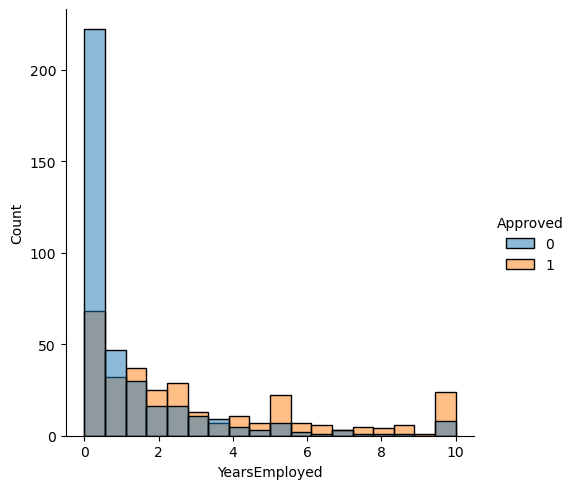

In [89]:
sns.displot(df,x='YearsEmployed',hue='Approved')

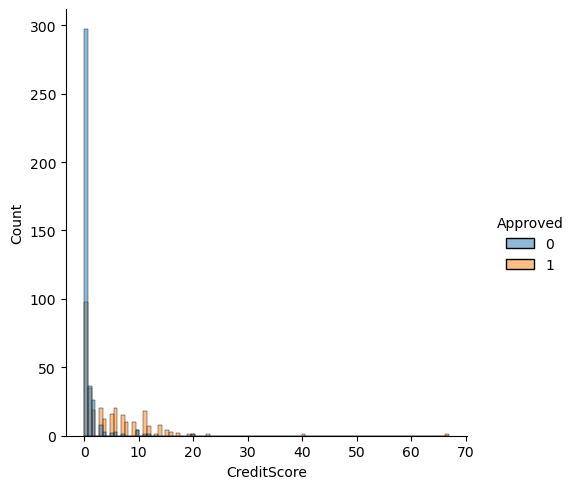

In [90]:
sns.displot(df,x='CreditScore',hue='Approved')

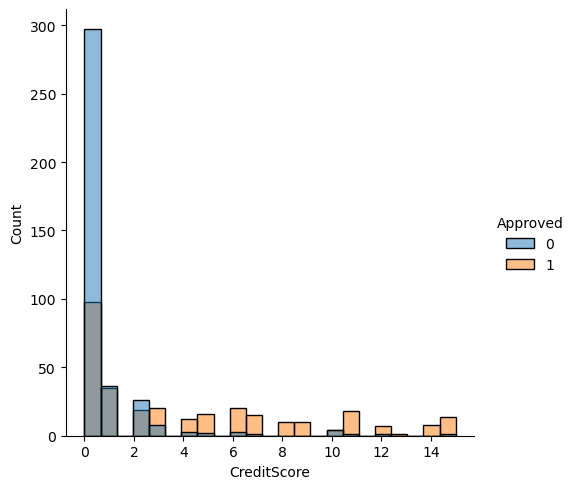

In [91]:
df['CreditScore'] = df['CreditScore'].clip(upper=15)
sns.displot(df,x='CreditScore',hue='Approved')

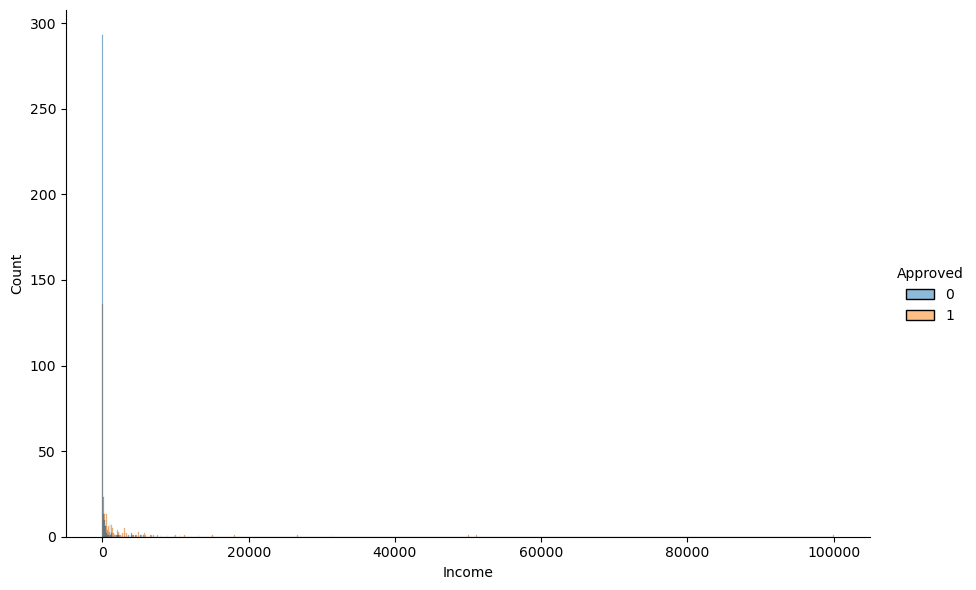

In [92]:

sns.displot(df, x='Income', hue='Approved', height=6, aspect=1.5)


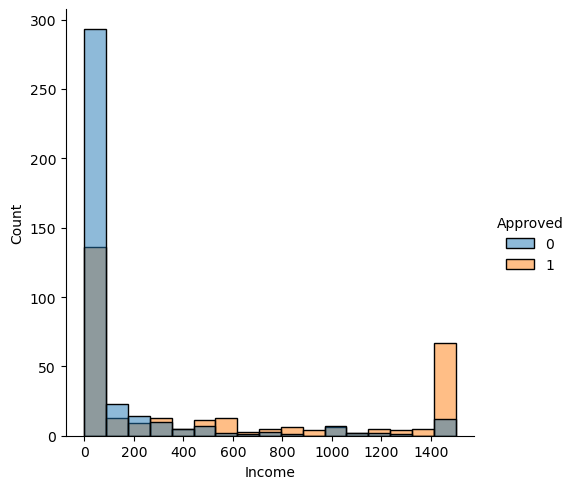

In [93]:
df['Income'] = df['Income'].clip(upper=1500)
sns.displot(df,x='Income',hue='Approved')

**Dummies**

In [94]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [95]:
df = df.drop(columns=['Citizen', 'Industry', 'Ethnicity'])


In [96]:
cat_feat = ['Gender','Married']

In [97]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Married'] = label_encoder.fit_transform(df['Married'])


In [98]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode',
       'Income', 'Approved'],
      dtype='object')

In [99]:
df

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,1.25,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,2.00,0,1,2,1,200,394,0
687,0,25.25,13.500,0,0,2.00,0,1,1,1,200,1,0
688,1,17.92,0.205,1,1,0.04,0,0,0,0,280,750,0


In [100]:
y = df.drop(columns=['Approved']) 

In [101]:
col=df.columns


In [102]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming 'df' is the DataFrame and 'Approved' is the target column in df
in_atts = df.columns.tolist()  # Corrected to refer to 'df' directly instead of 'y.columns'
in_atts.remove('Approved')  # Remove target column from features

y = df['Approved'] 

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[in_atts]), columns=in_atts)

rf = RandomForestClassifier(random_state=42)
rf.fit(df_std, y)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_features = [in_atts[i] for i in indices[:7]]
X_selected = df_std[top_features]  

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='recall')
grid_search.fit(X_selected, y)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_ * 100)


Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Score: 87.26070861977789


In [103]:


top_features = [in_atts[i] for i in indices[:8]]
top_features

['PriorDefault',
 'CreditScore',
 'YearsEmployed',
 'Debt',
 'Age',
 'ZipCode',
 'Income',
 'Employed']

In [104]:
df

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,202,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,43,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,280,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,100,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,1.25,0,0,0,0,260,0,0
686,0,22.67,0.750,1,1,2.00,0,1,2,1,200,394,0
687,0,25.25,13.500,0,0,2.00,0,1,1,1,200,1,0
688,1,17.92,0.205,1,1,0.04,0,0,0,0,280,750,0


# Train Test Split

In [105]:
features = ['Age', 'Employed' ,'PriorDefault',
       'CreditScore', 'Income']

target = ['Approved']

In [106]:
x = df[features]
y = df[target]

In [107]:
x

,Age,Employed,PriorDefault,CreditScore,Income
0,30.83,1,1,1,0
1,58.67,1,1,6,560
2,24.50,0,1,0,824
3,27.83,1,1,5,3
4,20.17,0,1,0,0
...,...,...,...,...,...
685,21.08,0,0,0,0
686,22.67,1,0,2,394
687,25.25,1,0,1,1
688,17.92,0,0,0,750


In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .3)

# Modeling

In [109]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [110]:
log = LogisticRegression().fit(x_train,y_train)

In [111]:
y_pred_train = log.predict(x_train)
y_pred_test = log.predict(x_test)

In [112]:
y_pred = log.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.85


In [113]:
log = LogisticRegression(max_iter=1000, random_state=42).fit(x_train, y_train)
y_pred_log = log.predict(x_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

Logistic Regression Accuracy: 0.85


In [114]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=32).fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.83


In [115]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


Naive Bayes Accuracy: 0.82


In [116]:
svm = SVC(random_state=42).fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.66


In [117]:
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)
y_pred_gbm = gbm.predict(x_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"GBM Accuracy: {accuracy_gbm:.2f}")

GBM Accuracy: 0.81


In [118]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.2f}")


AdaBoost Accuracy: 0.82


In [132]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(log, model_file)


# HYPERTUNING


In [120]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}
grid_search = GridSearchCV(RandomForestClassifier (random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', (grid_search.best_score_)*100)

Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Score: 87.9918384879725


In [121]:

log_reg = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300]  
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")

best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(x_train, y_train)

y_pred = best_log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.86
Test Accuracy: 0.83


In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  
}

grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")

best_gnb = GaussianNB(**best_params)
best_gnb.fit(x_train, y_train)

y_pred = best_gnb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Best Hyperparameters: {'var_smoothing': 1e-09}
Best Cross-validation Accuracy: 0.85
Test Accuracy: 0.82


# Building Hybrid model
Based on VotingClassifier

In [123]:
from sklearn.ensemble import VotingClassifier


rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
log_reg = LogisticRegression(C= 10, max_iter= 100 ,random_state=42)
nb = GaussianNB(var_smoothing=1e-09)

hybrid_model = VotingClassifier(estimators=[
    ('rf', rf),
    ('log_reg', log_reg),
    ('ada', ada)
], voting='hard')

hybrid_model.fit(x_train, y_train)

y_pred = hybrid_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Hybrid Model Accuracy: {accuracy:.2f}")




Hybrid Model Accuracy: 0.84


In [124]:
y_pred_train = hybrid_model.predict(x_train)
y_pred_test = hybrid_model.predict(x_test)

# Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix



In [126]:
def confusion_matrix_plot(y, y_pred, dataset='Train'):
  cm = confusion_matrix( y, y_pred, labels=[0, 1])
  df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                columns = [i for i in ['Predicted - No','Predicted - Yes']])
  group_counts = ["{0:0.0f}".format(value) for value in
              cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize = (8,5))
  sns.heatmap(df_cm, annot=labels,fmt='', cmap='crest')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title(f'{dataset} Confusion Matrix', fontsize=18)

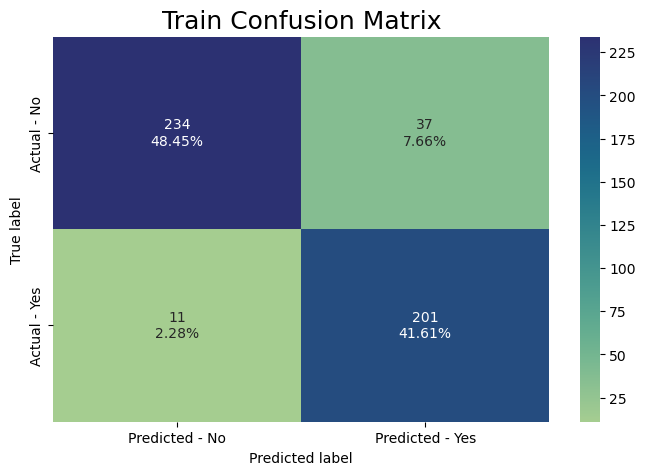

In [127]:
confusion_matrix_plot(y_train,y_pred_train)

In [128]:
train_scores = [hybrid_model.score(x_train[features],y_train)]
test_scores = [hybrid_model.score(x_test[features],y_test)]
models = ['Hybrid model']
score_dict = {
    'train_scores':train_scores,
    'test_scores':test_scores
}
pd.DataFrame(score_dict, index=models)


,train_scores,test_scores
Hybrid model,0.900621,0.835749


RANDOM FOREST

In [129]:
# Assuming `model` is your trained model

'''
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(models, model_file)

'''

"\nimport pickle\nwith open('model.pkl', 'wb') as model_file:\n    pickle.dump(models, model_file)\n\n"